# Проверка гипотез для увеличения выручки

**Заказчик** — интернет-магазин.

**Цель исследования** - отделу маркетинга необходимо проверить ряд гипотез для увеличения выручки: приоритизировать гипотезы, оценить A/B-тест и проанализировать результаты, проверить финансовую целесообразность внесения изменений в соответствии с гипотезой.

**Исходные данные** — статистика по клиентам, данные о заказах и о результатах теста.

## Вводные данные

Для начала работы загрузим библиотеки и исходные таблицы.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None) # необходимо для отображения всех столбцов на листе
pd.set_option('display.max_colwidth', 120)

import warnings
warnings.filterwarnings('ignore') # необходимо для отключения предупреждений jupyter
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

### hypothesis

In [2]:
hypothesis.head(5)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Видим заглавные буквы в названиях, лучше бы заменить.

In [4]:
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

### orders

In [5]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Не будет лишним проверить таблицу на дубликаты, и заменить формат даты.

In [7]:
orders.duplicated().sum()

0

In [8]:
orders['date'] = orders['date'].astype('datetime64')

### visitors

In [9]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
visitors['date'] = visitors['date'].astype('datetime64')

## Приоритизация гипотез

При знакомстве с таблицей увидели, имеется 9 гипотез. Необходимо расставить приоритеты.

### ICE

Начнем с метода ICE.

In [11]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

display(hypothesis[['hypothesis', 'impact', 'confidence', 'efforts', 'ICE']].sort_values(by = 'ICE', ascending = False))

,hypothesis,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1,1,1,1.000000


Наиболее важными гипотезами стали 8, 0 и 7 с примерно равным отрывом.

### RICE

In [12]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

display(hypothesis[['hypothesis', 'reach', 'impact', 'confidence', 'efforts', 'RICE']].sort_values('RICE', ascending = False))

,hypothesis,reach,impact,confidence,efforts,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,3.0


При методе RICE  с учетом охвата, в лидеры вырвались 7, 2, 0 и 6 гипотезы, причем 0 и 6 с одинаковыми баллами. Остальные гипотезы сильно отстают. Стоит отметить, 8 гипотеза, что была первой по методу ICE, теперь нивелировалась, у нее очень низкий охват. 7 поднялась в рейтинге, ее охват очень высокий.

## Анализ A/B-теста

В связи с дальнейшей необходимостью деления пользователей на группы А и В, проверим, чтобы один пользователь принадлежал только одной группе.

In [13]:
orderschek = orders.groupby('visitorId', as_index = False).agg({'group' : 'nunique'})
orderschek = orderschek[orderschek['group'] > 1]
orderschek.count()

visitorId    58
group        58
dtype: int64

В таблице присутствует 58 пользователей, принадлежащих к 2 группам. Удалим их.

In [14]:
orders = orders.drop(orders[orders['visitorId'].isin(orderschek['visitorId'])].index)
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1016 non-null int64
visitorId        1016 non-null int64
date             1016 non-null datetime64[ns]
revenue          1016 non-null int64
group            1016 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


Посмотрим соотношение групп по колличеству.

In [15]:
orders.groupby('group')['visitorId'].nunique()

group
A    445
B    528
Name: visitorId, dtype: int64

Доли в процентах составят: А - 45.73%, В - 54,27%. Таким образом, при таком различии выборки разница может составить 15,73%. Необходимо обязательно учесть этот факт при анализе.

### Анализ сырых данных

#### Кумулятивная выручка

Для подсчета кумулятивной выручки подготовим список уникальных дат.

In [16]:
datesGroups = orders[['date','group']].drop_duplicates() 

Перебором подсчитаем требуемые параметры.

In [17]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated.head(5)

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


Построим график по выручке в разрезе групп.

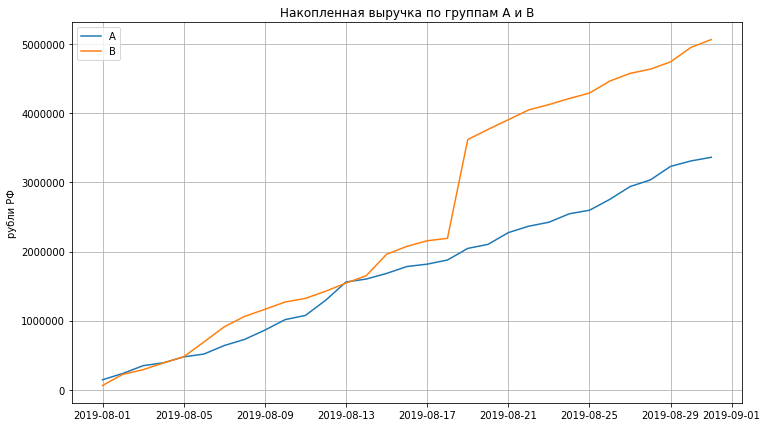

In [18]:
plt.figure(figsize=(12, 7))
plt.title('Накопленная выручка по группам А и В')
plt.ylabel('рубли РФ')
plt.grid(True)
plt.plot(ordersAggregated[ordersAggregated['group'] == 'A']['date'], ordersAggregated[ordersAggregated['group'] == 'A']['revenue'], label='A')
plt.plot(ordersAggregated[ordersAggregated['group'] == 'B']['date'], ordersAggregated[ordersAggregated['group'] == 'B']['revenue'], label='B')
plt.legend() 
plt.show()

Выручка почти равномерно увеличивается в течение всего теста. Однако по группе В график выручки в точке резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Такие выбросы проанализируем отдельно.

#### Кумулятивный средний чек

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов.

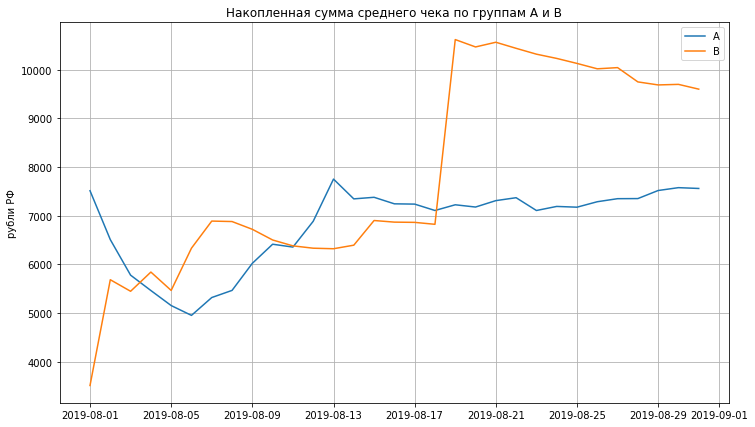

In [19]:
plt.figure(figsize=(12, 7))
plt.title('Накопленная сумма среднего чека по группам А и В')
plt.ylabel('рубли РФ')
plt.grid(True)
plt.plot(ordersAggregated[ordersAggregated['group'] == 'A']['date'], ordersAggregated[ordersAggregated['group'] == 'A']['revenue'] / ordersAggregated[ordersAggregated['group'] == 'A']['visitorId'], label='A')
plt.plot(ordersAggregated[ordersAggregated['group'] == 'B']['date'], ordersAggregated[ordersAggregated['group'] == 'B']['revenue'] / ordersAggregated[ordersAggregated['group'] == 'B']['visitorId'], label='B')
plt.legend() 
plt.show()

Средний чек не становится равномерным с течением теста. Возможно, в группу B попали крупные заказы (резкий всплеск на графике).

#### Относительное изменение кумулятивного среднего чека группы B к группе A

Попробуем посмотреть на график относительного изменения среднего чека в группах. Для этого добавим данные по группам в одну таблицу в разные столбцы.

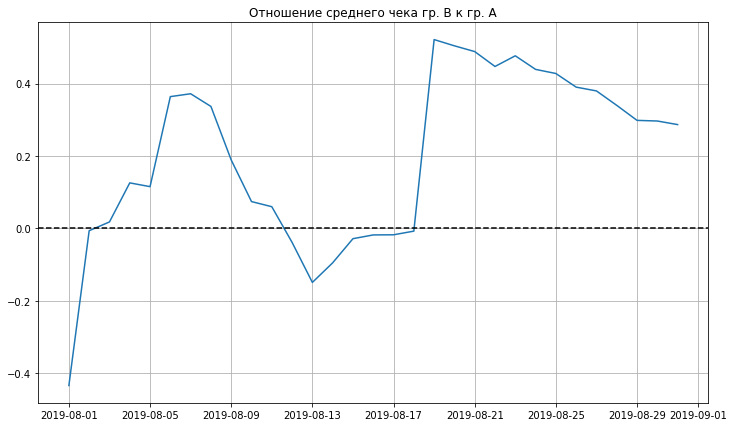

In [20]:
# разделим табличку на группы
cumulativedataA = ordersAggregated[ordersAggregated['group'] == 'A']
cumulativedataB = ordersAggregated[ordersAggregated['group'] == 'B']

mergedCumulativedata = cumulativedataA.merge(cumulativedataB, on='date', how='left', suffixes=['A', 'B'])
# соединим с присвоением суффиксов

plt.figure(figsize=(12, 7))
plt.title('Отношение среднего чека гр. В к гр. А')
plt.grid(True)
plt.plot(mergedCumulativedata['date'], (mergedCumulativedata['revenueB']/mergedCumulativedata['transactionIdB'])/(mergedCumulativedata['revenueA']/mergedCumulativedata['transactionIdA'])-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

В нескольких точках график различия между сегментами резко «скачет». Где-то имеются вбросы. Но даже по этому графику видно, что группа В имеет тенденцию к лучшим результатам по сравнению с А.

#### Кумулятивная конверсия по группам

Аналогичным образом проанализируем график кумулятивной конверсии. Конверсия - важнейший показатель. Для его нахождения необходимо подсчитать кумулятивные значения посетителей, и добавить в основную таблицу.

In [21]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeData2A = cumulativeData[cumulativeData['group']=='A']
cumulativeData2B = cumulativeData[cumulativeData['group']=='B']

display(cumulativeData.head(5)) 

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.031989
1,2019-08-01,B,17,17,59758,713,0.023843
2,2019-08-02,A,42,36,234381,1338,0.031390
3,2019-08-02,B,40,39,221801,1294,0.030912
4,2019-08-03,A,66,60,346854,1845,0.035772


Приступаем к графику

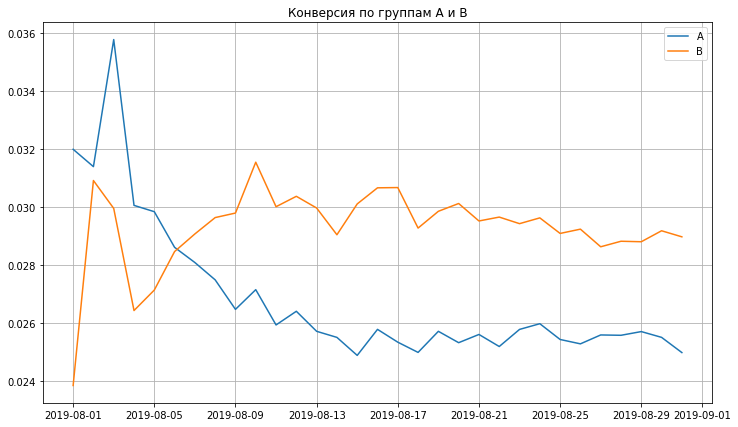

In [22]:
plt.figure(figsize=(12, 7))
plt.title('Конверсия по группам А и В')
plt.grid(True)
plt.plot(cumulativeData2A['date'], cumulativeData2A['conversion'], label='A')
plt.plot(cumulativeData2B['date'], cumulativeData2B['conversion'], label='B')
plt.legend()
plt.show()

По графику можно сказать, что конверсии в целом имеют нисходящий тренд, тем не менее, в группе В показатели лучше. Нововведения помогли клиентам решиться на покупку.

#### Относительное изменение кумулятивной конверсии группы B к группе A

Посмотрим на относительное изменение конверсий.

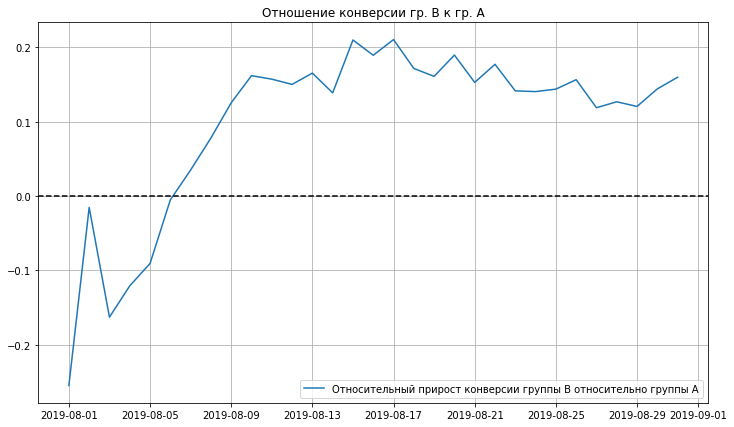

In [23]:
mergedCumulativeConversions = cumulativeData2A[['date','conversion']].merge(cumulativeData2B[['date','conversion']], on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 7))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.title('Отношение конверсии гр. В к гр. А')
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

По графику делаем вывод, что показатели группы В неуклонно растут в сравнении с А. Но график все же имеет сильные всплески. Необходимо их убрать и провести повторный анализ.

### Проверка аномалий

Найдем аномалии, которые были видны ранее на графиках.

#### Заказы по пользователям

Начнем с оценки заказов. Сгруппируем данные.

In [24]:
ordersgrouped = orders.groupby('visitorId', as_index = False).agg({'transactionId' : 'nunique'})
ordersgrouped.sort_values('transactionId', ascending = False).head(5)

,visitorId,transactionId
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


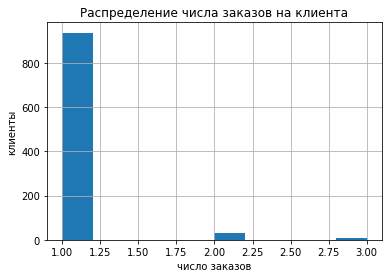

In [25]:
plt.hist(ordersgrouped['transactionId']) 
plt.title('Распределение числа заказов на клиента')
plt.ylabel('клиенты')
plt.xlabel('число заказов')
plt.grid(True)
plt.show()

Видим, имеются клиенты, кто делал более одного заказа.

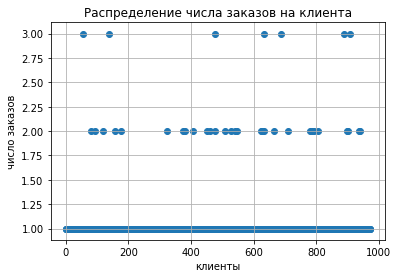

In [26]:
x_values = pd.Series(range(0,len(ordersgrouped['transactionId'])))
plt.scatter(x_values, ordersgrouped['transactionId']) 
plt.title('Распределение числа заказов на клиента')
plt.xlabel('клиенты')
plt.ylabel('число заказов')
plt.grid(True)
plt.show()

В основном делали по 1 и 2 заказа, 3 заказа сделало не так много людей, выясним сколько.

#### Перцентили количества заказов на пользователя

In [27]:
print(np.percentile(ordersgrouped['transactionId'], [95, 99])) 

[1. 2.]


Видим, что 3 заказа делали менее 1 процента клиентов.

#### Стоимость заказов

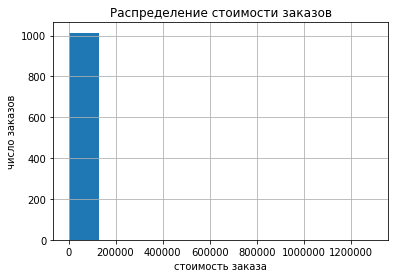

In [28]:
plt.hist(orders['revenue']) 
plt.title('Распределение стоимости заказов')
plt.ylabel('число заказов')
plt.xlabel('стоимость заказа')
plt.grid(True)
plt.show()

Ненаглядно, посмотрим точечный график.

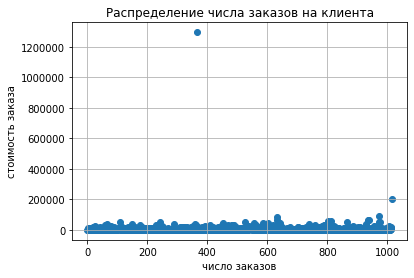

In [29]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.title('Распределение числа заказов на клиента')
plt.ylabel('стоимость заказа')
plt.xlabel('число заказов')
plt.grid(True)
plt.scatter(x_values, orders['revenue']) 
plt.show()

По полученному распределению видим, что всплесков незначительное количество, целесообразно их отсечь на уровне примерно 100 000, выясним.

#### Перцентили стоимости заказов

Для определения границы аномалии найдем перцентили.

In [30]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Выходит, разумным будет взять границу заказов по сумме в 53 000.

#### Граница аномалии

Примем за аномальных пользователей тех, кто совершил 3 заказа или совершил заказ дороже 53 000 рублей. Так мы уберём менее 1% пользователей с наибольшим числом заказов и от 1% до 2% пользователей с дорогими заказами. Сделаем срезы пользователей.
Узнаем, сколько всего аномальных пользователей.

In [31]:
ordersfiltered1 = orders.query('revenue > 53000')['visitorId']
ordersfiltered2 = ordersgrouped.query('transactionId >= 3')['visitorId']
abnormaldata = pd.concat([ordersfiltered1, ordersfiltered2], axis = 0).drop_duplicates().sort_values()
display(abnormaldata.head(5))
len(abnormaldata)

1099    148427295
55      249864742
138     611059232
949     887908475
744     888512513
Name: visitorId, dtype: int64

19

Выходит, в таблице имеем 19 пользователей с аномальными заказами. Подготовим таблицу очищенных данных.

In [32]:
ordersfiltered = orders[np.logical_not(orders['visitorId'].isin(abnormaldata))]
ordersfiltered.info()
ordersfiltered.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 1194
Data columns (total 5 columns):
transactionId    983 non-null int64
visitorId        983 non-null int64
date             983 non-null datetime64[ns]
revenue          983 non-null int64
group            983 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.1+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


### Сравнение статистической значимости

Теперь мы имеем исходные и фильтрованные данные, посчитаем конверсию для них в разрезе групп, и сравним, какое влияние оказывали аномальные покупатели.

#### Различия в конверсии между группами по «сырым» данным

Посчитаем статистическую значимость различия в конверсии между группами. Первым шагом найдем количество заказов на каждого пользователя по группам.

In [33]:
ordersusersA = (orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'}))
ordersusersB = (orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'}))
visitorsA = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsB = visitors[visitors['group'] == 'B'][['date', 'visitors']]

Добавим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [34]:
sampleA = pd.concat([ordersusersA['transactionId'], pd.Series(0, index=np.arange(visitorsA['visitors'].sum() \
                                        - len(ordersusersA['transactionId'])), name='orders')],axis=0)
sampleB = pd.concat([ordersusersB['transactionId'], pd.Series(0, index=np.arange(visitorsB['visitors'].sum() \
                                        - len(ordersusersB['transactionId'])), name='orders')],axis=0)

Проведем проверку критерием Манна-Уитни.

Гипотеза Но - Различия по группам А и В в Конверсии отсутствуют.

In [35]:
display(stats.mannwhitneyu(sampleA, sampleB)[1].round(3))

display((sampleB.mean() / sampleA.mean() - 1).round(2))

0.006

0.16

Первое число — p-value = 0.006 меньше 0.05. Отвергаем нулевую гипотезу: разница статистически значима. Относительное преимущество группы B  16% — второе число в выводе.

#### Различия в среднем чеке заказа между группами по «сырым» данным

Рассчитаем статистическую значимость различий в среднем чеке и относительные различия в среднем чеке между группами.
Гипотеза Но - Различия по группам А и В в сумме среднего чека отсутствуют.

In [36]:
print('{0:.2f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.2f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.41
0.29


P-value значительно больше 0.05 и составил 0,41. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Что странно, так как на кумулятивном графике мы наблюдали различие и всплеск по группе В. Впрочем, средний чек группы B значительно выше среднего чека группы A, на 30%.

#### Различия в конверсии между группами по «очищенным» данным

Ранее, мы подготовили данные, очищенные от выбросов. Узнаем, как это повлияло на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным.

Подготовим группы для расчетов.

In [37]:
ordersusersfilteredA = (ordersfiltered[ordersfiltered['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'}))
ordersusersfilteredB = (ordersfiltered[ordersfiltered['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'}))

Найдем ряды заказчиков.

In [38]:
sampleAFiltered = pd.concat([ordersusersfilteredA['transactionId'], pd.Series(0, index=np.arange(visitorsA['visitors'].sum() \
                                                            - len(ordersusersfilteredA['transactionId'])),name='orders',),],axis=0,)
sampleBFiltered = pd.concat([ordersusersfilteredB['transactionId'], pd.Series(0, index=np.arange(visitorsB['visitors'].sum() \
                                                            - len(ordersusersfilteredB['transactionId'])),name='orders',),],axis=0,)

Рассчитаем статистическую значимость.
Гипотеза Но - Различия по группам А и В в Конверсии отсутствуют.

In [39]:
display(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1].round(3))

display((sampleBFiltered.mean() / sampleAFiltered.mean() - 1).round(2))

0.003

0.19

Результаты по конверсии практически не изменились.

#### Различия в среднем чеке заказа между группами по «очищенным» данным

Гипотеза Но - Различия по группам А и В в сумме среднего чека отсутствуют.

In [40]:
print('{0:.2f}'.format(stats.mannwhitneyu(ordersfiltered[ordersfiltered['group']=='A']['revenue'], ordersfiltered[ordersfiltered['group']=='B']['revenue'])[1]))
print('{0:.2f}'.format(ordersfiltered[ordersfiltered['group']=='B']['revenue'].mean()/ordersfiltered[ordersfiltered['group']=='A']['revenue'].mean()-1)) 

0.42
-0.01


В среднем чеке по группам различий не должно быть. P-value почти не изменился, но и разница между сегментами обнулилась с 30%.
Наглядно видно, как сильно аномалии влияли на результаты A/B-теста. 

## Вывод по тесту

По итогам проделанных исследований данных по продажам интернет-магазина делаем следующие заключения:

- Наблюдается статистически значимое различие по конверсии между группами как по «сырым», так и по отфильтрованным данным;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- Результаты тестов по фильтрованным и обычным группам схожи, то есть аномалии не оказывали сильного воздействия на тесты, так и должно быть, ведь U-критерий Манна-Уитни применяется к данным с выбросами;
- Разница после отброса аномалий видна по сравнению относительных показателей, так резко сблизились результаты групп по среднему чеку.

Резюмируя все вышеизложенное считаю, результаты теста возможно зафиксировать и признать улучшение показателей после применения обновлений, группа В показала лучшие результаты по Конверсии почти на 20%, большему числу пользователей захотелось что-то приобрести. При этом средний чек не сильно изменился.
